In [1]:
!pip install rdkit karateclub networkx torch-geometric seaborn # or latest version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 42.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 68.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 73.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 37.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 45.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import networkx as nx
from karateclub import Graph2Vec, Node2Vec
import os
from torch_geometric.datasets import MoleculeNet
from matplotlib import pyplot as plt
import torch
import numpy as np
from tqdm import tqdm

dataset_path = '/kaggle/working/Clintox_Dataset'
os.makedirs(dataset_path, exist_ok=True)

In [3]:
clintox_dataset = MoleculeNet(root=dataset_path, name='ClinTox')

Extracting /kaggle/working/Clintox_Dataset/clintox/raw/clintox.csv.gz
Processing...
/opt/conda/lib/python3.10/site-packages/torch_geometric/datasets/molecule_net.py:213: UserWarning: Skipping molecule '[NH4][Pt]([NH4])(Cl)Cl' since it resulted in zero atoms
  warnings.warn(f"Skipping molecule '{smiles}' since it "
/opt/conda/lib/python3.10/site-packages/torch_geometric/datasets/molecule_net.py:213: UserWarning: Skipping molecule 'c1ccc(cc1)n2c(=O)c(c(=O)n2c3ccccc3)CCS(=O)c4ccccc4' since it resulted in zero atoms
  warnings.warn(f"Skipping molecule '{smiles}' since it "
/opt/conda/lib/python3.10/site-packages/torch_geometric/datasets/molecule_net.py:213: UserWarning: Skipping molecule 'CCCCc1c(=O)n(n(c1=O)c2ccc(cc2)O)c3ccccc3' since it resulted in zero atoms
  warnings.warn(f"Skipping molecule '{smiles}' since it "
/opt/conda/lib/python3.10/site-packages/torch_geometric/datasets/molecule_net.py:213: UserWarning: Skipping molecule 'CCCCc1c(=O)n(n(c1=O)c2ccccc2)c3ccccc3' since it resulted

In [4]:
print(type(clintox_dataset))
print(f"No. of features: {clintox_dataset.num_features}")   #  Returns the no. of features per node in the dataset
print(f"No. of classes: {clintox_dataset.num_classes}")     #  Returns the no. of classes per graph in the dataset (FDA Approved and Toxicity)
print(f"Length of the dataset: {clintox_dataset.len()}")    #  Size of the dataset
print()
print(f"Descrition of the dataset: {clintox_dataset[0]}")
print(f"No. of nodes in the 1st graph: {clintox_dataset[0].num_nodes}")
print(f"No. of edges in the 1st graph: {clintox_dataset[0].num_edges}")
print(f"No. of node features in the 1st graph: {clintox_dataset[0].num_node_features}")   #   There will be 9 features for every graph
print(f"No. of edge features in the 1st graph: {clintox_dataset[0].num_edge_features}")

<class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
No. of features: 9
No. of classes: 2
Length of the dataset: 1480

Descrition of the dataset: Data(x=[24, 9], edge_index=[2, 46], edge_attr=[46, 3], smiles='*C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC', y=[1, 2])
No. of nodes in the 1st graph: 24
No. of edges in the 1st graph: 46
No. of node features in the 1st graph: 9
No. of edge features in the 1st graph: 3


In [5]:
#  Visualisation of edge attributes

# edge_attr represents the edge attributes between nodes in each molecular graph.
# Each edge in a molecular graph typically represents a bond between two atoms, and the 
# edge_attr tensor contains the attributes associated with these bonds.
clintox_dataset[0].edge_attr

tensor([[1, 0, 0],
        [1, 0, 0],
        [2, 0, 0],
        [1, 0, 0],
        [2, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 1],
        [1, 0, 1],
        [2, 0, 1],
        [1, 0, 1],
        [2, 0, 1],
        [1, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 1],
        [1, 0, 1],
        [2, 0, 1],
        [1, 0, 1],
        [2, 0, 1],
        [1, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]])

In [6]:
print(clintox_dataset[0].x.shape)
print(clintox_dataset.x.shape)

torch.Size([24, 9])
torch.Size([38846, 9])


In [7]:
import random
import warnings
warnings.filterwarnings('ignore')
from torch_geometric.utils import to_networkx


i = random.randint(0, 1483)
graph_data = clintox_dataset[i]
smiles_string = clintox_dataset.data.smiles[i]
G = to_networkx(graph_data)

print(smiles_string)
print(G)

c1c(c(=O)[nH]c(=O)[nH]1)F
DiGraph with 9 nodes and 18 edges


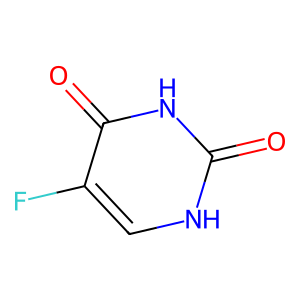

In [8]:
from rdkit import Chem
from rdkit.Chem import Draw

mol = Chem.MolFromSmiles(smiles_string)

# # Draw the molecule and display it
Draw.MolToImage(mol)

In [9]:
#  Number of atom present in this particular molecule
graph_data.num_nodes

9

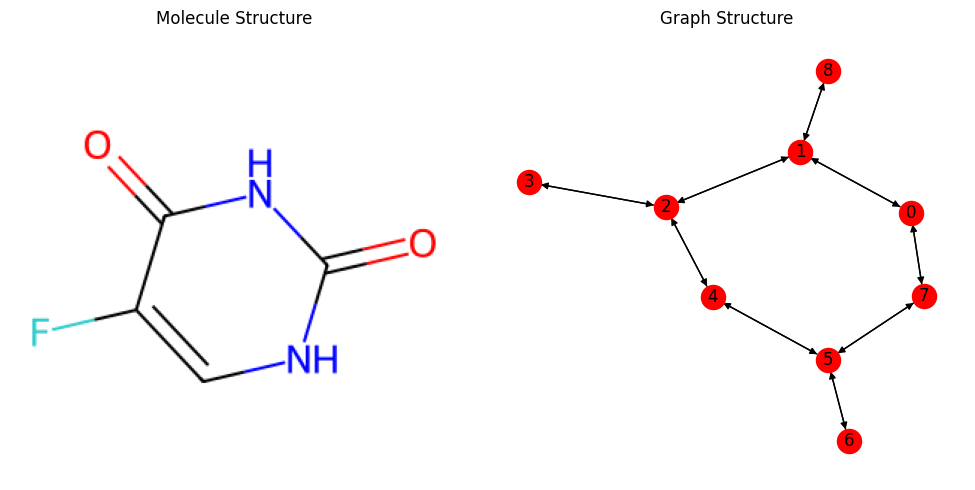

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Left: RDKit molecule drawing
axes[0].imshow(Draw.MolToImage(mol))
axes[0].axis('off')  # Turn off axes for the molecule image
axes[0].set_title("Molecule Structure")

# Right: NetworkX graph drawing
nx.draw(G, with_labels=True, node_color='red', ax=axes[1])
axes[1].set_title("Graph Structure")

# Display the figure
plt.tight_layout()
plt.show()

In [11]:
graph_data.x

tensor([[6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [8, 0, 1, 5, 0, 0, 3, 0, 0],
        [7, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [8, 0, 1, 5, 0, 0, 3, 0, 0],
        [7, 0, 3, 5, 1, 0, 3, 1, 1],
        [9, 0, 1, 5, 0, 0, 4, 0, 0]])

## Converting all the molecules into a vector using Graph2Vec (Problem with 11th graph)

In [12]:
# graph2vec = []

# graph_embed = Graph2Vec(dimensions=64, wl_iterations=2, attributed=False)
# data = [to_networkx(clintox_dataset[i]) for i in range(clintox_dataset.len())]
# graph_embed.fit(data)
# Embedding = graph_embed.get_embedding()

# for i in range(clintox_dataset.len()):
#     embedding = Embedding[i]
#     embedding = np.expand_dims(embedding, axis=1)
#     embedding = embedding.T
#     repeated_embedding = np.repeat(embedding, clintox_dataset[i].num_nodes, axis=0)
#     graph2vec.append(torch.tensor(repeated_embedding))

In [13]:
# for i in range(min(10,len(graph2vec))):
#     print(graph2vec[i].shape)

## Converting all the nodes of every into a vector using Node2Vec

In [14]:
# node2vec = []

In [15]:

# N2vec_model_global = Node2Vec(walk_number=10, walk_length=80, p=0.9, q=0.1, dimensions=64)
# for i in tqdm(range(clintox_dataset.len()), desc="Generating Node2Vec embeddings"):
#     if i != 11:                                                          #   A necessary evil :(    [Problem in the dataset, not in code]
#         graph = to_networkx(clintox_dataset[i])
#         N2vec_model_global.fit(graph)
#         N2Vec_global_embedding = N2vec_model_global.get_embedding()
#         node2vec.append(torch.tensor(N2Vec_global_embedding))
#     else:
#         node2vec.append(torch.zeros((clintox_dataset[i].x.shape[0], 64)))                           #   This is done just for the sake of it. Remove the 

In [16]:
# #   Node2Vec embeddings for all the nodes of all the drugs
# for i in range(min(15,len(node2vec))):
#     print(node2vec[i].shape)

## Merging clintox_dataset.x, node2vec and graph2vec

In [17]:
# for i in range(min(5, clintox_dataset.len())):
#     print(clintox_dataset[i].x.shape)

In [18]:
# print(len(node2vec))
# print(len(graph2vec))
# print(clintox_dataset.len())

In [19]:
# clintox_dataset[1479].x

In [20]:
# processed_embeddings = []
# for i in tqdm(range(1250, clintox_dataset.len()), desc="Concatenating embeddings"):
#     concatenated_embeds = np.concatenate([clintox_dataset[i].x, node2vec[i-1250], graph2vec[i]], axis=1)
#     processed_embeddings.append(concatenated_embeds)

In [21]:
# for i in range(min(15,len(processed_embeddings))):
#     print(processed_embeddings[i].shape)

### Saving the embeddings as a pickle file

In [22]:
# import pickle
# with open("processed_embeddings.pkl", "wb") as f:
#     pickle.dump(processed_embeddings, f)

### Downloading the Pickle File Embeddings

In [23]:
# from IPython.display import FileLink

# # Display a download link for the file
# FileLink("processed_embeddings.pkl")

### Embeddings of all the graphs together

In [24]:
import pickle

# Load the pickle file
with open("/kaggle/input/all-processed-embeddings/processed_embeddings_final.pkl", "rb") as f:
    processed_embeddings = pickle.load(f)

In [25]:
len(processed_embeddings)

1480

In [26]:
for i in range(min(15, len(processed_embeddings))):
    print(processed_embeddings[i].shape)

(24, 137)
(12, 137)
(14, 137)
(22, 137)
(27, 137)
(4, 137)
(2, 137)
(5, 137)
(5, 137)
(5, 137)
(5, 137)
(1, 137)
(28, 137)
(28, 137)
(23, 137)


In [27]:
#    Only the embeddings from Node2Vec
# for i in range(len(processed_embeddings)):
#         processed_embeddings[i] = processed_embeddings[i][:,9:]
for i in range(len(processed_embeddings)):
    processed_embeddings[i] = np.concatenate((processed_embeddings[i][:, :9], processed_embeddings[i][:, (64+9):]), axis=1)

In [28]:
for i in range(min(15, len(processed_embeddings))):
    print(processed_embeddings[i].shape)

(24, 73)
(12, 73)
(14, 73)
(22, 73)
(27, 73)
(4, 73)
(2, 73)
(5, 73)
(5, 73)
(5, 73)
(5, 73)
(1, 73)
(28, 73)
(28, 73)
(23, 73)


In [29]:
S_SHAPE = processed_embeddings[0].shape[1]
S_SHAPE

73

## Overwriting the clintox_dataset.x with my new processed embeddings

In [30]:
from torch_geometric.data import Data

new_data_list = []
for i in range(len(clintox_dataset)):
    if i != 11:
        data = clintox_dataset[i]
    
        # Ensure processed_embeddings[i] is a tensor
        x_new = torch.tensor(processed_embeddings[i], dtype=torch.float)
    
        # Create a new Data object with the updated x
        data_new = Data(
            x=x_new,
            edge_index=data.edge_index,
            y=data.y,
            edge_attr=data.edge_attr if 'edge_attr' in data else None,
            pos=data.pos if 'pos' in data else None,
        )
    
        # Append the new data object to the list
        new_data_list.append(data_new)


In [31]:
len(new_data_list)

1479

In [32]:
print(clintox_dataset.x.shape)
print(clintox_dataset[5].x.shape)

torch.Size([38846, 9])
torch.Size([4, 9])


# Model-I: Using Simple Graph Convolution

In [33]:
import torch
from torch.nn import Linear
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool, GATConv, TransformerConv
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

In [34]:
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(42)

        self.initial_conv = GCNConv(S_SHAPE, 16)    # Input dimension updated to 137
        self.conv1 = GCNConv(16, 8)
        self.conv2 = GCNConv(8, 8)
        self.conv3 = GCNConv(8, 8)

        self.linear1 = Linear(8 * 2, 8)
        self.linear2 = Linear(8, 8)
        self.out = Linear(8, 1)

    def forward(self, x, edge_index, batch_index):
        hidden = self.initial_conv(x, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv1(hidden, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = torch.tanh(hidden)

        # Global pooling
        hidden = torch.cat([gmp(hidden, batch_index), gap(hidden, batch_index)], dim=1)

        # Linear layers
        hidden = self.linear1(hidden)
        hidden = F.relu(hidden)
        hidden = self.linear2(hidden)
        hidden = F.relu(hidden)

        out = self.out(hidden)

        return out, hidden


model = GCN()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GCN(
  (initial_conv): GCNConv(73, 16)
  (conv1): GCNConv(16, 8)
  (conv2): GCNConv(8, 8)
  (conv3): GCNConv(8, 8)
  (linear1): Linear(in_features=16, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
)
Number of parameters:  1681


In [35]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

# Set up device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

data_size = len(new_data_list)
NUM_GRAPHS_PER_BATCH = 32

train_dataset = new_data_list[:int(data_size * 0.8)]
test_dataset = new_data_list[int(data_size * 0.8):]

train_loader = DataLoader(train_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)


In [36]:
#   Distribution of toxic drugs in train and test dataset
#   84 toxic drugs in train and 28 toxic drugs in test data.....
#   So, 75% of the toxic drugs are in train data and 25% are in test data

toxic_in_train = 0
toxic_in_test = 0
for i in range(len(train_dataset)):
    toxic_in_train += train_dataset[i].y[0, 1]

for i in range(len(test_dataset)):
    toxic_in_test += test_dataset[i].y[0, 1]


print(toxic_in_train, toxic_in_test)

tensor(83.) tensor(28.)


In [37]:

def train():
    model.train()
    total_loss = 0

    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
        target = batch.y[:, 1].float().view(-1, 1)  # Adjust if necessary
        loss = loss_fn(pred, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(train_loader)

In [38]:
def test():
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for batch in test_loader:
            batch = batch.to(device)
            pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
            target = batch.y[:, 1].float().view(-1, 1)  # Adjust if necessary
            loss = loss_fn(pred, target)
            total_loss += loss.item()

    return total_loss / len(test_loader)

In [39]:
# Step 7: Verify data consistency (optional)
for batch in train_loader:
    print(f"x shape: {batch.x.shape}")
    print(f"edge_index shape: {batch.edge_index.shape}")
    print(f"batch shape: {batch.batch.shape}")
    print(f"y shape: {batch.y.shape}")
    break

x shape: torch.Size([883, 73])
edge_index shape: torch.Size([2, 1880])
batch shape: torch.Size([883])
y shape: torch.Size([32, 2])


In [40]:
print("Starting training...")
num_epochs = 22
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = train()
    test_loss = test()
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")


Starting training...
Epoch 1/22 | Train Loss: 0.60129 | Test Loss: 0.55527
Epoch 2/22 | Train Loss: 0.49720 | Test Loss: 0.46280
Epoch 3/22 | Train Loss: 0.39058 | Test Loss: 0.39491
Epoch 4/22 | Train Loss: 0.30149 | Test Loss: 0.34307
Epoch 5/22 | Train Loss: 0.26401 | Test Loss: 0.31881
Epoch 6/22 | Train Loss: 0.25497 | Test Loss: 0.29823
Epoch 7/22 | Train Loss: 0.25453 | Test Loss: 0.29964
Epoch 8/22 | Train Loss: 0.25414 | Test Loss: 0.34725
Epoch 9/22 | Train Loss: 0.25428 | Test Loss: 0.32341
Epoch 10/22 | Train Loss: 0.25417 | Test Loss: 0.32319
Epoch 11/22 | Train Loss: 0.25450 | Test Loss: 0.29893
Epoch 12/22 | Train Loss: 0.25438 | Test Loss: 0.37151
Epoch 13/22 | Train Loss: 0.25418 | Test Loss: 0.34880
Epoch 14/22 | Train Loss: 0.25432 | Test Loss: 0.29942
Epoch 15/22 | Train Loss: 0.25437 | Test Loss: 0.29862
Epoch 16/22 | Train Loss: 0.25434 | Test Loss: 0.32351
Epoch 17/22 | Train Loss: 0.25434 | Test Loss: 0.32416
Epoch 18/22 | Train Loss: 0.25425 | Test Loss: 0.2991

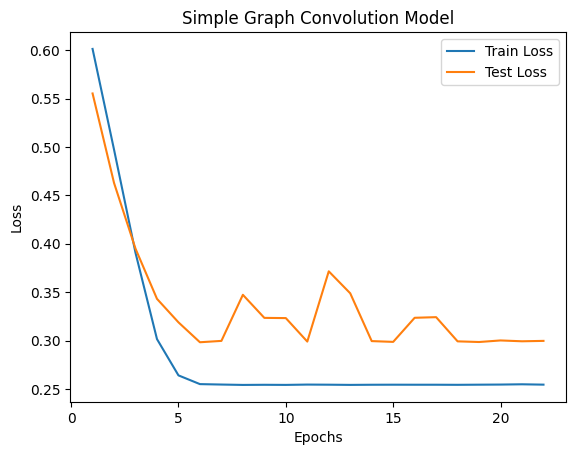

In [41]:
import seaborn as sns
epochs = range(1, num_epochs + 1)
sns.lineplot(x=epochs, y=train_losses, label="Train Loss")
sns.lineplot(x=epochs, y=test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Simple Graph Convolution Model")
plt.legend()
plt.show()

In [42]:
def predict():
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_targets = []

    with torch.no_grad():  # Disable gradient calculation
        for batch in test_loader:
            batch = batch.to(device)
            pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
            
            # Apply sigmoid to get probabilities
            probs = torch.sigmoid(pred)
            
            # Threshold probabilities to get predicted labels
            predicted_labels = (probs > 0.5).float()
            
            # Collect predictions and actual labels
            all_preds.append(predicted_labels.cpu())
            all_targets.append(batch.y[:, 1].float().view(-1, 1).cpu())  # Adjust if necessary

    # Concatenate all predictions and targets
    all_preds = torch.cat(all_preds, dim=0)
    all_targets = torch.cat(all_targets, dim=0)

    return all_preds, all_targets


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Call the predict function to get predictions and targets
predictions, targets = predict()

# Convert tensors to numpy arrays for metric calculation (optional)
predictions_np = predictions.numpy()
targets_np = targets.numpy()


accuracy = accuracy_score(targets_np, predictions_np)
precision = precision_score(targets_np, predictions_np)
recall = recall_score(targets_np, predictions_np)
f1 = f1_score(targets_np, predictions_np)
roc = roc_auc_score(targets_np, predictions_np)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc:.4f}")

Accuracy: 0.9054
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC Score: 0.5000


In [44]:
#  No. of drugs predicted as toxic by our model
print(f"No. of drugs predicted as toxic by our model out of {int(toxic_in_test)} toxic drugs_: {np.sum(predictions_np == 1)}")

No. of drugs predicted as toxic by our model out of 28 toxic drugs_: 0


In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=targets_np, y_pred=predictions_np))

[[268   0]
 [ 28   0]]


In [46]:
print("For now, 0 toxic drug is predicted correctly")

For now, 0 toxic drug is predicted correctly


# Model-II: Using GCN with Class Imbalance (Best performing model till now) 

In [47]:
class GCNWithClassImbalance(torch.nn.Module):
    def __init__(self):
        super(GCNWithClassImbalance, self).__init__()
        torch.manual_seed(42)

        self.initial_conv = TransformerConv(S_SHAPE, 16)    # Input dimension updated to 137
        self.conv1 = GCNConv(16, 8)
        self.conv2 = GCNConv(8, 8)
        self.conv3 = GCNConv(8, 4)
        

        self.linear1 = Linear(4 * 2, 8)
        self.linear2 = Linear(8, 4)
        self.out = Linear(4, 1)

    def forward(self, x, edge_index, batch_index):
        hidden = self.initial_conv(x, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv1(hidden, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = torch.tanh(hidden)

        # Global pooling
        hidden = torch.cat([gmp(hidden, batch_index), gap(hidden, batch_index)], dim=1)

        # Linear layers
        hidden = self.linear1(hidden)
        hidden = F.relu(hidden)
        hidden = self.linear2(hidden)
        hidden = F.relu(hidden)

        out = self.out(hidden)

        return out, hidden


model = GCNWithClassImbalance()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GCNWithClassImbalance(
  (initial_conv): TransformerConv(73, 16, heads=1)
  (conv1): GCNConv(16, 8)
  (conv2): GCNConv(8, 8)
  (conv3): GCNConv(8, 4)
  (linear1): Linear(in_features=8, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=1, bias=True)
)
Number of parameters:  5093


In [48]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [49]:
# Split the data into training and testing sets
data_size = len(new_data_list)
NUM_GRAPHS_PER_BATCH = 32

train_dataset = new_data_list[:int(data_size * 0.8)]
test_dataset = new_data_list[int(data_size * 0.8):]

train_loader = DataLoader(train_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

In [50]:
# Function to extract labels from the dataset
def get_labels(dataset):
    labels = []
    for data in dataset:
        m = data.y[0, 1]
        labels.append(m)
    return labels

In [51]:
M_factor = 1.25

# Compute class weights based on the training dataset
labels = get_labels(train_dataset)
labels = np.array(labels)

num_positive = np.sum(labels == 1)
num_negative = np.sum(labels == 0)

pos_weight_value = num_negative / (num_positive * M_factor)
pos_weight = torch.tensor([pos_weight_value], dtype=torch.float).to(device)

print(f"Number of positive samples: {num_positive}")
print(f"Number of negative samples: {num_negative}")
print(f"Computed pos_weight for BCEWithLogitsLoss: {pos_weight_value:.4f}")

Number of positive samples: 83
Number of negative samples: 1100
Computed pos_weight for BCEWithLogitsLoss: 10.6024


In [52]:
# Define the loss function with class weights
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

# Training function
def train():
    model.train()
    total_loss = 0

    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)

        target = batch.y[:, 1].float().view(-1, 1)  # Adjust if necessary

        loss = loss_fn(pred, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(train_loader)

In [53]:
# Testing function
def test():
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for batch in test_loader:
            batch = batch.to(device)
            pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)

            target = batch.y[:, 1].float().view(-1, 1)  # Adjust if necessary

            loss = loss_fn(pred, target)
            total_loss += loss.item()

    return total_loss / len(test_loader)

In [54]:
# Start training
print("Starting training...")
num_epochs = 25
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = train()
    test_loss = test()
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

Starting training...
Epoch 1/25 | Train Loss: 1.17066 | Test Loss: 1.33853
Epoch 2/25 | Train Loss: 1.15871 | Test Loss: 1.34185
Epoch 3/25 | Train Loss: 1.15401 | Test Loss: 1.41508
Epoch 4/25 | Train Loss: 1.15211 | Test Loss: 1.28140
Epoch 5/25 | Train Loss: 1.15051 | Test Loss: 1.42668
Epoch 6/25 | Train Loss: 1.15023 | Test Loss: 1.36047
Epoch 7/25 | Train Loss: 1.14958 | Test Loss: 1.35914
Epoch 8/25 | Train Loss: 1.14769 | Test Loss: 1.35711
Epoch 9/25 | Train Loss: 1.14665 | Test Loss: 1.35845
Epoch 10/25 | Train Loss: 1.14575 | Test Loss: 1.35485
Epoch 11/25 | Train Loss: 1.14625 | Test Loss: 1.28820
Epoch 12/25 | Train Loss: 1.14705 | Test Loss: 1.43425
Epoch 13/25 | Train Loss: 1.14522 | Test Loss: 1.28639
Epoch 14/25 | Train Loss: 1.14468 | Test Loss: 1.43424
Epoch 15/25 | Train Loss: 1.14391 | Test Loss: 1.27935
Epoch 16/25 | Train Loss: 1.14331 | Test Loss: 1.34375
Epoch 17/25 | Train Loss: 1.13819 | Test Loss: 1.27429
Epoch 18/25 | Train Loss: 1.13580 | Test Loss: 1.3320

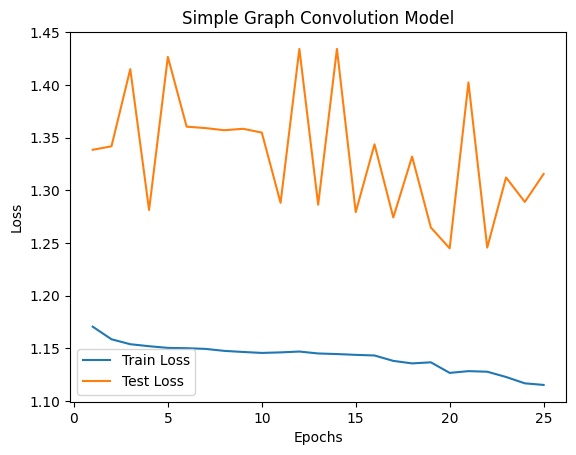

In [55]:
import seaborn as sns
epochs = range(1, num_epochs + 1)
sns.lineplot(x=epochs, y=train_losses, label="Train Loss")
sns.lineplot(x=epochs, y=test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Simple Graph Convolution Model")
plt.legend()
plt.show()

In [56]:
def predict():
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_targets = []

    with torch.no_grad():  # Disable gradient calculation
        for batch in test_loader:
            batch = batch.to(device)
            pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
            
            # Apply sigmoid to get probabilities
            probs = torch.sigmoid(pred)
            
            # Threshold probabilities to get predicted labels
            predicted_labels = (probs > 0.5).float()
            
            # Collect predictions and actual labels
            all_preds.append(predicted_labels.cpu())
            all_targets.append(batch.y[:, 1].float().view(-1, 1).cpu())  # Adjust if necessary

    # Concatenate all predictions and targets
    all_preds = torch.cat(all_preds, dim=0)
    all_targets = torch.cat(all_targets, dim=0)

    return all_preds, all_targets

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Call the predict function to get predictions and targets
predictions, targets = predict()

# Convert tensors to numpy arrays for metric calculation (optional)
predictions_np = predictions.numpy()
targets_np = targets.numpy()


accuracy = accuracy_score(targets_np, predictions_np)
precision = precision_score(targets_np, predictions_np)
recall = recall_score(targets_np, predictions_np)
f1 = f1_score(targets_np, predictions_np)
roc = roc_auc_score(targets_np, predictions_np)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc:.4f}")

Accuracy: 0.9122
Precision: 1.0000
Recall: 0.0714
F1 Score: 0.1333
ROC-AUC Score: 0.5357


In [58]:
#  No. of drugs predicted as toxic by our model
print(f"No. of drugs predicted as toxic by our model: {np.sum(predictions_np == 1)} out of {len(test_dataset)} data points")
print(f"Total no. of toxic drugs in the test set: {toxic_in_test}")

No. of drugs predicted as toxic by our model: 2 out of 296 data points
Total no. of toxic drugs in the test set: 28.0


In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=targets_np, y_pred=predictions_np))

[[268   0]
 [ 26   2]]


In [60]:
print("Best Model till now....!!")
print(f"Also it achieves the highest ROC-AUC score till now with a score of: {roc:0.5f}")
print("An ROC-AUC score of 0.5 indicates that the model has no predictive power and is same as random guessing")

Best Model till now....!!
Also it achieves the highest ROC-AUC score till now with a score of: 0.53571
An ROC-AUC score of 0.5 indicates that the model has no predictive power and is same as random guessing


# Model-III: Using  Graph Attention Mechanism:-

In [61]:
import torch
from torch.nn import Linear
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool, GATConv
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

In [62]:
class GAT(torch.nn.Module):
    def __init__(self):
        super(GAT, self).__init__()
        torch.manual_seed(42)

        self.initial_conv = GATConv(S_SHAPE, 16)    # Input dimension updated to 137
        self.conv1 = GATConv(16, 16)
        self.conv2 = GATConv(16, 16)
        self.conv3 = GATConv(16, 16)

        self.out = Linear(16 * 2, 1)

    def forward(self, x, edge_index, batch_index):
        hidden = self.initial_conv(x, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv1(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = F.tanh(hidden)

        hidden = torch.cat([gmp(hidden, batch_index), gap(hidden, batch_index)], dim=1)

        out = self.out(hidden)

        return out, hidden

model_2 = GAT()
print(model_2)
print("Number of parameters: ", sum(p.numel() for p in model_2.parameters()))

GAT(
  (initial_conv): GATConv(73, 16, heads=1)
  (conv1): GATConv(16, 16, heads=1)
  (conv2): GATConv(16, 16, heads=1)
  (conv3): GATConv(16, 16, heads=1)
  (out): Linear(in_features=32, out_features=1, bias=True)
)
Number of parameters:  2161


In [63]:
M_factor = 1.25

# Compute class weights based on the training dataset
labels = get_labels(train_dataset)
labels = np.array(labels)

num_positive = np.sum(labels == 1)
num_negative = np.sum(labels == 0)

pos_weight_value = num_negative / (num_positive * M_factor)
pos_weight = torch.tensor([pos_weight_value], dtype=torch.float).to(device)

print(f"Number of positive samples: {num_positive}")
print(f"Number of negative samples: {num_negative}")
print(f"Computed pos_weight for BCEWithLogitsLoss: {pos_weight_value:.4f}")

Number of positive samples: 83
Number of negative samples: 1100
Computed pos_weight for BCEWithLogitsLoss: 10.6024


In [64]:
# Define the loss function with class weights
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.0007)

# Training function
def train():
    model_2.train()
    total_loss = 0

    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        pred, embedding = model_2(batch.x.float(), batch.edge_index, batch.batch)

        target = batch.y[:, 1].float().view(-1, 1)  # Adjust if necessary

        loss = loss_fn(pred, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(train_loader)

In [65]:
def test():
    model_2.eval()
    total_loss = 0

    with torch.no_grad():
        for batch in test_loader:
            batch = batch.to(device)
            pred, embedding = model_2(batch.x.float(), batch.edge_index, batch.batch)
            target = batch.y[:, 1].float().view(-1, 1)  # Adjust if necessary
            loss = loss_fn(pred, target)
            total_loss += loss.item()

    return total_loss / len(test_loader)

In [66]:
print("Starting training...")
num_epochs = 12
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = train()
    test_loss = test()
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")


Starting training...
Epoch 1/12 | Train Loss: 1.17248 | Test Loss: 1.35115
Epoch 2/12 | Train Loss: 1.15206 | Test Loss: 1.28701
Epoch 3/12 | Train Loss: 1.14966 | Test Loss: 1.28364
Epoch 4/12 | Train Loss: 1.14830 | Test Loss: 1.28661
Epoch 5/12 | Train Loss: 1.14921 | Test Loss: 1.27611
Epoch 6/12 | Train Loss: 1.14831 | Test Loss: 1.35772
Epoch 7/12 | Train Loss: 1.14345 | Test Loss: 1.34489
Epoch 8/12 | Train Loss: 1.14067 | Test Loss: 1.32911
Epoch 9/12 | Train Loss: 1.14719 | Test Loss: 1.27343
Epoch 10/12 | Train Loss: 1.13378 | Test Loss: 1.33821
Epoch 11/12 | Train Loss: 1.13108 | Test Loss: 1.32663
Epoch 12/12 | Train Loss: 1.12078 | Test Loss: 1.23575


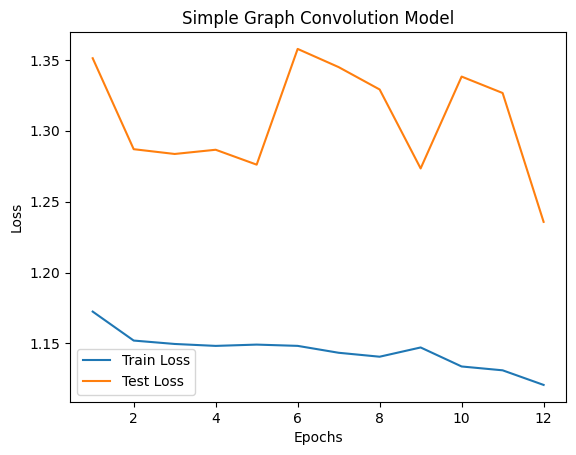

In [67]:
import seaborn as sns
epochs = range(1, num_epochs + 1)
sns.lineplot(x=epochs, y=train_losses, label="Train Loss")
sns.lineplot(x=epochs, y=test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Simple Graph Convolution Model")
plt.legend()
plt.show()

In [68]:
def predict():
    model_2.eval()  # Set model to evaluation mode
    all_preds = []
    all_targets = []

    with torch.no_grad():  # Disable gradient calculation
        for batch in test_loader:
            batch = batch.to(device)
            pred, embedding = model_2(batch.x.float(), batch.edge_index, batch.batch)
            
            # Apply sigmoid to get probabilities
            probs = torch.sigmoid(pred)
            
            # Threshold probabilities to get predicted labels
            predicted_labels = (probs > 0.5).float()
            
            # Collect predictions and actual labels
            all_preds.append(predicted_labels.cpu())
            all_targets.append(batch.y[:, 1].float().view(-1, 1).cpu())  # Adjust if necessary

    # Concatenate all predictions and targets
    all_preds = torch.cat(all_preds, dim=0)
    all_targets = torch.cat(all_targets, dim=0)

    return all_preds, all_targets


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Call the predict function to get predictions and targets
predictions, targets = predict()

# Convert tensors to numpy arrays for metric calculation (optional)
predictions_np = predictions.numpy()
targets_np = targets.numpy()


accuracy = accuracy_score(targets_np, predictions_np)
precision = precision_score(targets_np, predictions_np)
recall = recall_score(targets_np, predictions_np)
f1 = f1_score(targets_np, predictions_np)
roc = roc_auc_score(targets_np, predictions_np)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc:.4f}")

Accuracy: 0.8953
Precision: 0.3636
Recall: 0.1429
F1 Score: 0.2051
ROC-AUC Score: 0.5584


In [70]:
#  No. of drugs predicted as toxic by our model
print(f"No. of drugs predicted as toxic by our model out of {int(toxic_in_test)} toxic drugs_: {np.sum(predictions_np == 1)}")

No. of drugs predicted as toxic by our model out of 28 toxic drugs_: 11


In [71]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=targets_np, y_pred=predictions_np))

[[261   7]
 [ 24   4]]


# Model-IV: Using Transformer Graph Convolution:-

In [72]:
import torch
from torch.nn import Linear
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool, TransformerConv, GCNConv, SAGEConv
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

In [73]:
#   Description: 2 GCNConv Layers followed by 2 transformer conv layers

class Transformer(torch.nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        torch.manual_seed(42)

        self.initial_conv = GCNConv(S_SHAPE, 16)    # Input dimension updated to 137
        self.conv1 = GCNConv(16, 8)
        self.conv2 = TransformerConv(8, 8)
        self.conv3 = TransformerConv(8, 4)
        

        self.linear1 = Linear(4 * 2, 8)
        self.linear2 = Linear(8, 4)
        self.out = Linear(4, 1)

    def forward(self, x, edge_index, batch_index):
        hidden = self.initial_conv(x, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv1(hidden, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = torch.tanh(hidden)

        # Global pooling
        hidden = torch.cat([gmp(hidden, batch_index), gap(hidden, batch_index)], dim=1)

        # Linear layers
        hidden = self.linear1(hidden)
        hidden = F.relu(hidden)
        hidden = self.linear2(hidden)
        hidden = F.relu(hidden)

        out = self.out(hidden)

        return out, hidden


model = Transformer()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

Transformer(
  (initial_conv): GCNConv(73, 16)
  (conv1): GCNConv(16, 8)
  (conv2): TransformerConv(8, 8, heads=1)
  (conv3): TransformerConv(8, 4, heads=1)
  (linear1): Linear(in_features=8, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=1, bias=True)
)
Number of parameters:  1865


In [74]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [75]:
# Split the data into training and testing sets
data_size = len(new_data_list)
NUM_GRAPHS_PER_BATCH = 32

train_dataset = new_data_list[:int(data_size * 0.8)]
test_dataset = new_data_list[int(data_size * 0.8):]

train_loader = DataLoader(train_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

In [76]:
# Function to extract labels from the dataset
def get_labels(dataset):
    labels = []
    for data in dataset:
        m = data.y[0, 1]
        labels.append(m)
    return labels

In [77]:
M_factor = 1.25

# Compute class weights based on the training dataset
labels = get_labels(train_dataset)
labels = np.array(labels)

num_positive = np.sum(labels == 1)
num_negative = np.sum(labels == 0)

pos_weight_value = num_negative / (num_positive * M_factor)
pos_weight = torch.tensor([pos_weight_value], dtype=torch.float).to(device)

print(f"Number of positive samples: {num_positive}")
print(f"Number of negative samples: {num_negative}")
print(f"Computed pos_weight for BCEWithLogitsLoss: {pos_weight_value:.4f}")

Number of positive samples: 83
Number of negative samples: 1100
Computed pos_weight for BCEWithLogitsLoss: 10.6024


In [78]:
# Define the loss function with class weights
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

# Training function
def train():
    model.train()
    total_loss = 0

    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)

        target = batch.y[:, 1].float().view(-1, 1)  # Adjust if necessary

        loss = loss_fn(pred, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(train_loader)

In [79]:
# Testing function
def test():
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for batch in test_loader:
            batch = batch.to(device)
            pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)

            target = batch.y[:, 1].float().view(-1, 1)  # Adjust if necessary

            loss = loss_fn(pred, target)
            total_loss += loss.item()

    return total_loss / len(test_loader)

In [80]:
# Start training
print("Starting training...")
num_epochs = 20
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = train()
    test_loss = test()
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

Starting training...
Epoch 1/20 | Train Loss: 1.16557 | Test Loss: 1.27479
Epoch 2/20 | Train Loss: 1.15122 | Test Loss: 1.27716
Epoch 3/20 | Train Loss: 1.14677 | Test Loss: 1.35659
Epoch 4/20 | Train Loss: 1.14433 | Test Loss: 1.43222
Epoch 5/20 | Train Loss: 1.14347 | Test Loss: 1.28010
Epoch 6/20 | Train Loss: 1.14487 | Test Loss: 1.28361
Epoch 7/20 | Train Loss: 1.14162 | Test Loss: 1.43454
Epoch 8/20 | Train Loss: 1.14011 | Test Loss: 1.35668
Epoch 9/20 | Train Loss: 1.14126 | Test Loss: 1.28099
Epoch 10/20 | Train Loss: 1.13946 | Test Loss: 1.27680
Epoch 11/20 | Train Loss: 1.13852 | Test Loss: 1.35423
Epoch 12/20 | Train Loss: 1.13763 | Test Loss: 1.26060
Epoch 13/20 | Train Loss: 1.13594 | Test Loss: 1.25578
Epoch 14/20 | Train Loss: 1.13525 | Test Loss: 1.27030
Epoch 15/20 | Train Loss: 1.13112 | Test Loss: 1.34853
Epoch 16/20 | Train Loss: 1.12297 | Test Loss: 1.28787
Epoch 17/20 | Train Loss: 1.10861 | Test Loss: 1.40190
Epoch 18/20 | Train Loss: 1.11484 | Test Loss: 1.3774

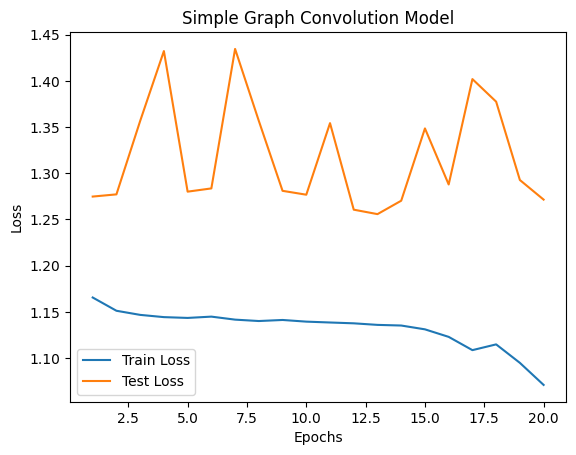

In [81]:
import seaborn as sns
epochs = range(1, num_epochs + 1)
sns.lineplot(x=epochs, y=train_losses, label="Train Loss")
sns.lineplot(x=epochs, y=test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Simple Graph Convolution Model")
plt.legend()
plt.show()

In [82]:
def predict():
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_targets = []

    with torch.no_grad():  # Disable gradient calculation
        for batch in test_loader:
            batch = batch.to(device)
            pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
            
            # Apply sigmoid to get probabilities
            probs = torch.sigmoid(pred)
            
            # Threshold probabilities to get predicted labels
            predicted_labels = (probs > 0.5).float()
            
            # Collect predictions and actual labels
            all_preds.append(predicted_labels.cpu())
            all_targets.append(batch.y[:, 1].float().view(-1, 1).cpu())  # Adjust if necessary

    # Concatenate all predictions and targets
    all_preds = torch.cat(all_preds, dim=0)
    all_targets = torch.cat(all_targets, dim=0)

    return all_preds, all_targets


In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Call the predict function to get predictions and targets
predictions, targets = predict()

# Convert tensors to numpy arrays for metric calculation (optional)
predictions_np = predictions.numpy()
targets_np = targets.numpy()


accuracy = accuracy_score(targets_np, predictions_np)
precision = precision_score(targets_np, predictions_np)
recall = recall_score(targets_np, predictions_np)
f1 = f1_score(targets_np, predictions_np)
roc = roc_auc_score(targets_np, predictions_np)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc:.4f}")

Accuracy: 0.9054
Precision: 0.5000
Recall: 0.0714
F1 Score: 0.1250
ROC-AUC Score: 0.5320


In [84]:
#  No. of drugs predicted as toxic by our model
print(f"No. of drugs predicted as toxic by our model out of {int(toxic_in_test)} toxic drugs: {np.sum(predictions_np == 1)}")

No. of drugs predicted as toxic by our model out of 28 toxic drugs: 4


In [85]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=targets_np, y_pred=predictions_np))

[[266   2]
 [ 26   2]]


# Model-V: Using SAGEConv Architecture:-

In [86]:
import torch
from torch.nn import Linear
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool, SAGEConv
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

In [87]:
class SAGE(torch.nn.Module):
    def __init__(self):
        super(SAGE, self).__init__()
        torch.manual_seed(42)

        self.initial_conv = SAGEConv(S_SHAPE, 16)    # Input dimension updated to 137
        self.conv1 = SAGEConv(16, 8)
        self.conv2 = SAGEConv(8, 8)
        self.conv3 = SAGEConv(8, 4)
        

        self.linear1 = Linear(4 * 2, 8)
        self.linear2 = Linear(8, 4)
        self.out = Linear(4, 1)

    def forward(self, x, edge_index, batch_index):
        hidden = self.initial_conv(x, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv1(hidden, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = torch.tanh(hidden)

        # Global pooling
        hidden = torch.cat([gmp(hidden, batch_index), gap(hidden, batch_index)], dim=1)

        # Linear layers
        hidden = self.linear1(hidden)
        hidden = F.relu(hidden)
        hidden = self.linear2(hidden)
        hidden = F.relu(hidden)

        out = self.out(hidden)

        return out, hidden


model = SAGE()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

SAGE(
  (initial_conv): SAGEConv(73, 16, aggr=mean)
  (conv1): SAGEConv(16, 8, aggr=mean)
  (conv2): SAGEConv(8, 8, aggr=mean)
  (conv3): SAGEConv(8, 4, aggr=mean)
  (linear1): Linear(in_features=8, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=1, bias=True)
)
Number of parameters:  2933


In [88]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [89]:
# Split the data into training and testing sets
data_size = len(new_data_list)
NUM_GRAPHS_PER_BATCH = 32

train_dataset = new_data_list[:int(data_size * 0.8)]
test_dataset = new_data_list[int(data_size * 0.8):]

train_loader = DataLoader(train_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

In [90]:
# Function to extract labels from the dataset
def get_labels(dataset):
    labels = []
    for data in dataset:
        m = data.y[0, 1]
        labels.append(m)
    return labels

In [91]:
M_factor = 1.25

# Compute class weights based on the training dataset
labels = get_labels(train_dataset)
labels = np.array(labels)

num_positive = np.sum(labels == 1)
num_negative = np.sum(labels == 0)

pos_weight_value = num_negative / (num_positive * M_factor)
pos_weight = torch.tensor([pos_weight_value], dtype=torch.float).to(device)

print(f"Number of positive samples: {num_positive}")
print(f"Number of negative samples: {num_negative}")
print(f"Computed pos_weight for BCEWithLogitsLoss: {pos_weight_value:.4f}")

Number of positive samples: 83
Number of negative samples: 1100
Computed pos_weight for BCEWithLogitsLoss: 10.6024


In [92]:
# Define the loss function with class weights
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

# Training function
def train():
    model.train()
    total_loss = 0

    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)

        target = batch.y[:, 1].float().view(-1, 1)  # Adjust if necessary

        loss = loss_fn(pred, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(train_loader)

In [93]:
# Testing function
def test():
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for batch in test_loader:
            batch = batch.to(device)
            pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)

            target = batch.y[:, 1].float().view(-1, 1)  # Adjust if necessary

            loss = loss_fn(pred, target)
            total_loss += loss.item()

    return total_loss / len(test_loader)

In [94]:
# Start training
print("Starting training...")
num_epochs = 12
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = train()
    test_loss = test()
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

Starting training...
Epoch 1/12 | Train Loss: 1.15277 | Test Loss: 1.41604
Epoch 2/12 | Train Loss: 1.15073 | Test Loss: 1.48403
Epoch 3/12 | Train Loss: 1.14908 | Test Loss: 1.34535
Epoch 4/12 | Train Loss: 1.14887 | Test Loss: 1.34581
Epoch 5/12 | Train Loss: 1.14714 | Test Loss: 1.27497
Epoch 6/12 | Train Loss: 1.14544 | Test Loss: 1.27337
Epoch 7/12 | Train Loss: 1.14452 | Test Loss: 1.27209
Epoch 8/12 | Train Loss: 1.14334 | Test Loss: 1.34190
Epoch 9/12 | Train Loss: 1.14153 | Test Loss: 1.26916
Epoch 10/12 | Train Loss: 1.13949 | Test Loss: 1.33579
Epoch 11/12 | Train Loss: 1.13884 | Test Loss: 1.26639
Epoch 12/12 | Train Loss: 1.13591 | Test Loss: 1.26328


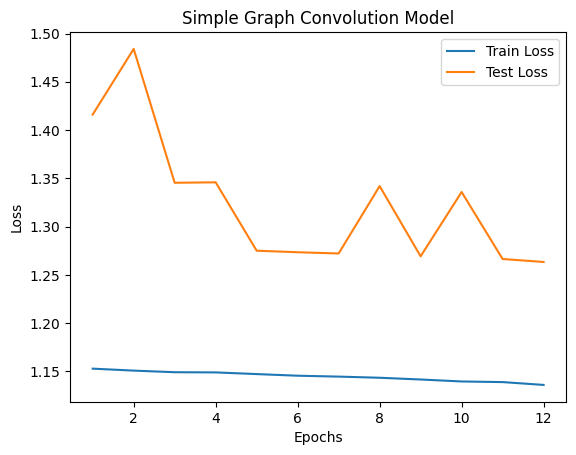

In [95]:
import seaborn as sns
epochs = range(1, num_epochs + 1)
sns.lineplot(x=epochs, y=train_losses, label="Train Loss")
sns.lineplot(x=epochs, y=test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Simple Graph Convolution Model")
plt.legend()
plt.show()

In [96]:
def predict():
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_targets = []

    with torch.no_grad():  # Disable gradient calculation
        for batch in test_loader:
            batch = batch.to(device)
            pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
            
            # Apply sigmoid to get probabilities
            probs = torch.sigmoid(pred)
            
            # Threshold probabilities to get predicted labels
            predicted_labels = (probs > 0.5).float()
            
            # Collect predictions and actual labels
            all_preds.append(predicted_labels.cpu())
            all_targets.append(batch.y[:, 1].float().view(-1, 1).cpu())  # Adjust if necessary

    # Concatenate all predictions and targets
    all_preds = torch.cat(all_preds, dim=0)
    all_targets = torch.cat(all_targets, dim=0)

    return all_preds, all_targets


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Call the predict function to get predictions and targets
predictions, targets = predict()

# Convert tensors to numpy arrays for metric calculation (optional)
predictions_np = predictions.numpy()
targets_np = targets.numpy()


accuracy = accuracy_score(targets_np, predictions_np)
precision = precision_score(targets_np, predictions_np)
recall = recall_score(targets_np, predictions_np)
f1 = f1_score(targets_np, predictions_np)
roc = roc_auc_score(targets_np, predictions_np)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc:.4f}")

Accuracy: 0.9122
Precision: 1.0000
Recall: 0.0714
F1 Score: 0.1333
ROC-AUC Score: 0.5357


In [98]:
#  No. of drugs predicted as toxic by our model
print(f"No. of drugs predicted as toxic by our model out of {int(toxic_in_test)} toxic drugs: {np.sum(predictions_np == 1)}")

No. of drugs predicted as toxic by our model out of 28 toxic drugs: 2


In [99]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=targets_np, y_pred=predictions_np))

[[268   0]
 [ 26   2]]


# Model-VI: Using ResGatedConv Architecture:-

In [100]:
import torch
from torch.nn import Linear
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool,ResGatedGraphConv
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

In [101]:
class ResGated(torch.nn.Module):
    def __init__(self):
        super(ResGated, self).__init__()
        torch.manual_seed(42)

        self.initial_conv = ResGatedGraphConv(S_SHAPE, 16)    # Input dimension updated to 137
        self.conv1 = ResGatedGraphConv(16, 8)
        self.conv2 = ResGatedGraphConv(8, 8)
        self.conv3 = ResGatedGraphConv(8, 4)
        

        self.linear1 = Linear(4 * 2, 8)
        self.linear2 = Linear(8, 4)
        self.out = Linear(4, 1)

    def forward(self, x, edge_index, batch_index):
        hidden = self.initial_conv(x, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv1(hidden, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = torch.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = torch.tanh(hidden)

        # Global pooling
        hidden = torch.cat([gmp(hidden, batch_index), gap(hidden, batch_index)], dim=1)

        # Linear layers
        hidden = self.linear1(hidden)
        hidden = F.relu(hidden)
        hidden = self.linear2(hidden)
        hidden = F.relu(hidden)

        out = self.out(hidden)

        return out, hidden


model = ResGated()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

ResGated(
  (initial_conv): ResGatedGraphConv(73, 16)
  (conv1): ResGatedGraphConv(16, 8)
  (conv2): ResGatedGraphConv(8, 8)
  (conv3): ResGatedGraphConv(8, 4)
  (linear1): Linear(in_features=8, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=1, bias=True)
)
Number of parameters:  5825


In [102]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [103]:
# Split the data into training and testing sets
data_size = len(new_data_list)
NUM_GRAPHS_PER_BATCH = 32

train_dataset = new_data_list[:int(data_size * 0.8)]
test_dataset = new_data_list[int(data_size * 0.8):]

train_loader = DataLoader(train_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

In [104]:
# Function to extract labels from the dataset
def get_labels(dataset):
    labels = []
    for data in dataset:
        m = data.y[0, 1]
        labels.append(m)
    return labels

In [105]:
M_factor = 1.25

# Compute class weights based on the training dataset
labels = get_labels(train_dataset)
labels = np.array(labels)

num_positive = np.sum(labels == 1)
num_negative = np.sum(labels == 0)

pos_weight_value = num_negative / (num_positive * M_factor)
pos_weight = torch.tensor([pos_weight_value], dtype=torch.float).to(device)

print(f"Number of positive samples: {num_positive}")
print(f"Number of negative samples: {num_negative}")
print(f"Computed pos_weight for BCEWithLogitsLoss: {pos_weight_value:.4f}")

Number of positive samples: 83
Number of negative samples: 1100
Computed pos_weight for BCEWithLogitsLoss: 10.6024


In [106]:
# Define the loss function with class weights
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

# Training function
def train():
    model.train()
    total_loss = 0

    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)

        target = batch.y[:, 1].float().view(-1, 1)  # Adjust if necessary

        loss = loss_fn(pred, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(train_loader)

In [107]:
# Testing function
def test():
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for batch in test_loader:
            batch = batch.to(device)
            pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)

            target = batch.y[:, 1].float().view(-1, 1)  # Adjust if necessary

            loss = loss_fn(pred, target)
            total_loss += loss.item()

    return total_loss / len(test_loader)

In [108]:
# Start training
print("Starting training...")
num_epochs = 25
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = train()
    test_loss = test()
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

Starting training...
Epoch 1/25 | Train Loss: 1.22825 | Test Loss: 1.34448
Epoch 2/25 | Train Loss: 1.20490 | Test Loss: 1.38804
Epoch 3/25 | Train Loss: 1.18711 | Test Loss: 1.33520
Epoch 4/25 | Train Loss: 1.17074 | Test Loss: 1.33700
Epoch 5/25 | Train Loss: 1.15906 | Test Loss: 1.34345
Epoch 6/25 | Train Loss: 1.15344 | Test Loss: 1.35118
Epoch 7/25 | Train Loss: 1.15213 | Test Loss: 1.28479
Epoch 8/25 | Train Loss: 1.15136 | Test Loss: 1.28551
Epoch 9/25 | Train Loss: 1.15061 | Test Loss: 1.35915
Epoch 10/25 | Train Loss: 1.14971 | Test Loss: 1.50989
Epoch 11/25 | Train Loss: 1.15095 | Test Loss: 1.36305
Epoch 12/25 | Train Loss: 1.15077 | Test Loss: 1.43858
Epoch 13/25 | Train Loss: 1.15113 | Test Loss: 1.36032
Epoch 14/25 | Train Loss: 1.15029 | Test Loss: 1.28778
Epoch 15/25 | Train Loss: 1.15025 | Test Loss: 1.29007
Epoch 16/25 | Train Loss: 1.15020 | Test Loss: 1.28834
Epoch 17/25 | Train Loss: 1.15053 | Test Loss: 1.43776
Epoch 18/25 | Train Loss: 1.14970 | Test Loss: 1.3619

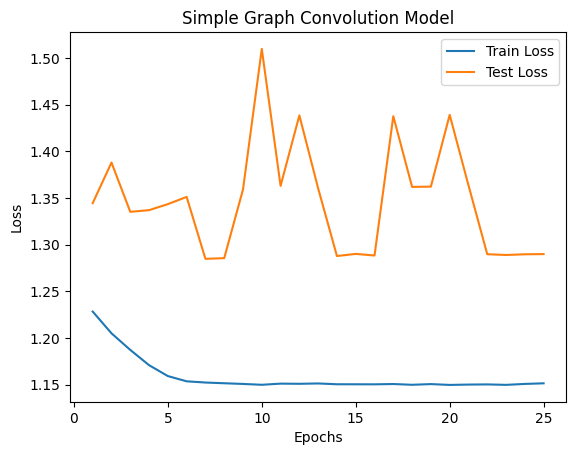

In [109]:
import seaborn as sns
epochs = range(1, num_epochs + 1)
sns.lineplot(x=epochs, y=train_losses, label="Train Loss")
sns.lineplot(x=epochs, y=test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Simple Graph Convolution Model")
plt.legend()
plt.show()

In [110]:
def predict():
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_targets = []

    with torch.no_grad():  # Disable gradient calculation
        for batch in test_loader:
            batch = batch.to(device)
            pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
            
            # Apply sigmoid to get probabilities
            probs = torch.sigmoid(pred)
            
            # Threshold probabilities to get predicted labels
            predicted_labels = (probs > 0.5).float()
            
            # Collect predictions and actual labels
            all_preds.append(predicted_labels.cpu())
            all_targets.append(batch.y[:, 1].float().view(-1, 1).cpu())  # Adjust if necessary

    # Concatenate all predictions and targets
    all_preds = torch.cat(all_preds, dim=0)
    all_targets = torch.cat(all_targets, dim=0)

    return all_preds, all_targets


In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Call the predict function to get predictions and targets
predictions, targets = predict()

# Convert tensors to numpy arrays for metric calculation (optional)
predictions_np = predictions.numpy()
targets_np = targets.numpy()


accuracy = accuracy_score(targets_np, predictions_np)
precision = precision_score(targets_np, predictions_np)
recall = recall_score(targets_np, predictions_np)
f1 = f1_score(targets_np, predictions_np)
roc = roc_auc_score(targets_np, predictions_np)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc:.4f}")

Accuracy: 0.9054
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC Score: 0.5000


In [112]:
#  No. of drugs predicted as toxic by our model
print(f"No. of drugs predicted as toxic by our model out of {int(toxic_in_test)} toxic drugs: {np.sum(predictions_np == 1)}")

No. of drugs predicted as toxic by our model out of 28 toxic drugs: 0


In [113]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=targets_np, y_pred=predictions_np))

[[268   0]
 [ 28   0]]
